# K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm. In clustering algorithms, the dataset is unlabeled as in the case of Supervised Algorithms. We just have the features and we want to segregate the data into two or more clusters.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
data = {'x1': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51], 
        'x2': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 5, 29, 27, 8, 7 ]} 

df = pd.DataFrame(data, columns = ['x1', 'x2'])
df.head(10)

,x1,x2
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


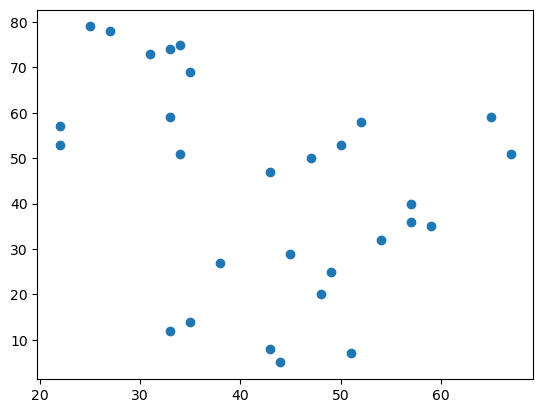

In [17]:
plt.scatter(df['x1'], df['x2'])

We have plotted a graph between two features x1 and x2. We want to segregate this graph into as many clusters as we want.

In [20]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

KMeans(n_clusters=2)

Initially, it will consider 2 nodes as center points and compute the distance of nodes from the center points. If a node is near to cluster 1 than it's part of first cluster and vice versa for cluster 2.

This is an iterative process to find the best center point and the cluster.

In [23]:
centroids = kmeans.cluster_centers_
centroids

array([[38.75      , 61.625     ],
       [47.15384615, 22.30769231]])

In [25]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

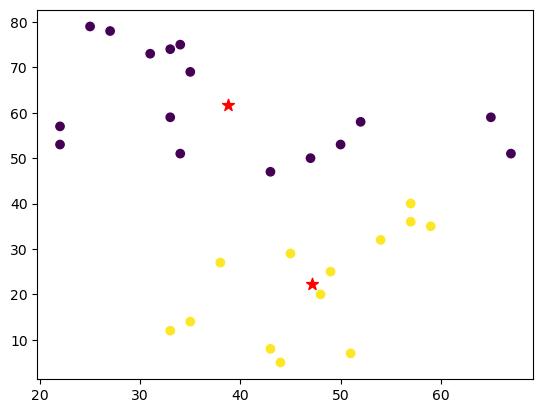

In [33]:
plt.scatter(df['x1'], df['x2'], c = kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = '*', s = 80)

We can create n number of clusters as per our requirement. But it is important to choose optimal number of clusters. Knee method or elbow method is a popular technique used in K-Means clustering to select the optimal number of clusters.

### Inertia
Inertia is the sum of squared distances of each data point to its closest cluster center. In elbow method, we calculate the inertia for different values of k to identify the elbow point.

In [36]:
kmeans.inertia_

7419.211538461538

In [41]:
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

sse

[19013.241379310348,
 7419.211538461538,
 3628.688888888889,
 2836.15873015873,
 2213.5499999999997,
 1393.6785714285716,
 896.7666666666667,
 902.0166666666667,
 561.6666666666666,
 470.08333333333326]

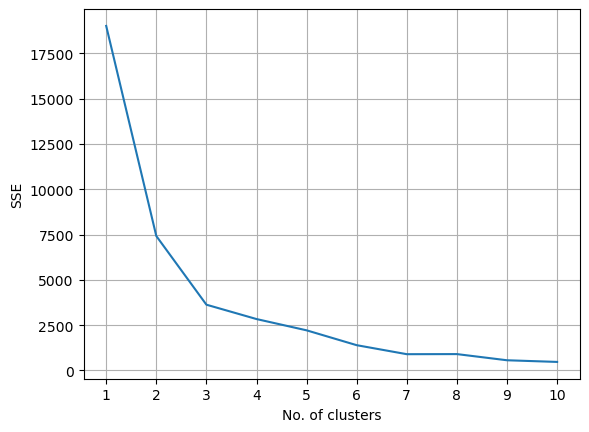

In [49]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

We can observe that the curve is getting bent abruptly at 2 and 3. Hence we can create a maximum of 3 clusters.

### Kneed Library

We can also install kneed library to find the knee.

In [56]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [60]:
from kneed import KneeLocator

In [62]:
k1 = KneeLocator(x = range(1, 11), y = sse, curve = 'convex', direction = 'decreasing')

k1.elbow

3

Now, we should create appropriate number of clusters.

In [67]:
kmeans = KMeans(n_clusters = 3)

kmeans.fit(df)

y_pred = kmeans.labels_

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [69]:
df['label'] = y_pred
df

,x1,x2,label
0,25,79,0
1,34,51,0
2,22,53,0
3,27,78,0
4,33,59,0
5,33,74,0
6,31,73,0
7,22,57,0
8,35,69,0
9,34,75,0


In [73]:
centroids = kmeans.cluster_centers_
centroids

array([[29.6       , 66.8       ],
       [55.1       , 46.1       ],
       [42.88888889, 16.33333333]])

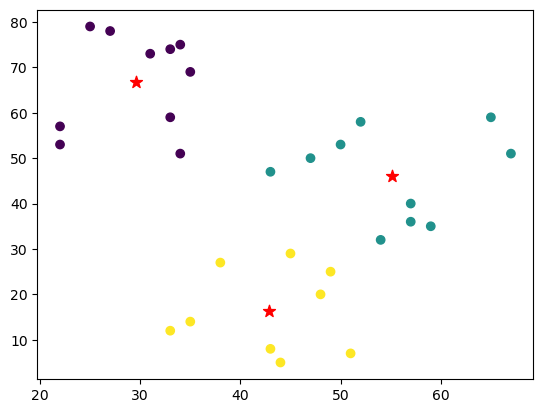

In [77]:
plt.scatter(df['x1'], df['x2'], c = kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = '*', s = 80)